# COVID19 Heathcare prediction project

## Defining problem
Recent pandemic due to COVID19 from China has impacted various aspects of our life. Although some patients do not show any sympotoms of the virus, other patients show severe symptoms that requires to be hospitalized. Due to the limited space of bed in hospitals, it is crucial to predict the length of the stay of patients.

#### The purpose of this project is to predict the duration each patient stays at hospital based on features about hospitals and patient status.

### Data loading

In [3]:
import pandas as pd
import seaborn as sns

train = pd.read_csv("train_data.csv", index_col="case_id")
train["dataset"] = "train"
print(train.shape)
train.head()

(318438, 18)


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
case_id,,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train


In [4]:
test = pd.read_csv("test_data.csv", index_col="case_id")
test["dataset"] = "test"
print(test.shape)
test

(137057, 17)


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,dataset
case_id,,,,,,,,,,,,,,,,,
318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0,test
318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0,test
318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0,test
318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0,test
318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,test
455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,test
455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,test


## Pre processing


In [5]:
# combine train + test dataset 

trts = pd.concat([train,test])

print(trts.shape)
trts.head()

(455495, 18)


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
case_id,,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train


In [6]:
replace_values = {'0-10' : 5, 
                  '11-20' : 15, 
                  '21-30' : 25,
                  '31-40' : 35,
                  '41-50' : 45,
                  '51-60' : 55,
                  '61-70' : 65,
                  '71-80' : 75,
                  '81-90' : 85,
                  '91-100': 95
                 }                                                                                          

trts["Age_num"] = trts["Age"].map(replace_values) 
trts["Age_num"].unique() 

array([55, 75, 35, 45, 85, 65, 25, 15,  5, 95])

In [7]:
replace_values = {'0-10' : 0, 
                  '11-20' : 1, 
                  '21-30' : 2,
                  '31-40' : 3,
                  '41-50' : 4,
                  '51-60' : 5,
                  '61-70' : 6,
                  '71-80' : 7,
                  '81-90' : 8,
                  '91-100' : 9,
                  'More than 100 Days' : 10
                 }                                                                                          

trts["Stay_num"] = trts["Stay"].map(replace_values) 
  


In [8]:
trts["Hospital_code"].unique() 

array([ 8,  2, 10, 26, 23, 32,  1, 22, 16,  9,  6, 29, 12,  3, 21, 28, 27,
       19,  5, 14, 13, 31, 24, 17, 25, 15, 11, 30, 18,  4,  7, 20])

In [9]:
trts["City_Code_Hospital"].unique() 


array([ 3,  5,  1,  2,  6,  9, 10,  4, 11,  7, 13])

In [10]:
trts["Hospital_region_code"].unique() 

array(['Z', 'X', 'Y'], dtype=object)

In [11]:
trts["Available Extra Rooms in Hospital"].unique() 

array([ 3,  2,  1,  4,  6,  5,  7,  8,  9, 10, 12,  0, 11, 20, 14, 21, 13,
       24])

In [12]:
trts["Department"].unique() 

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [13]:
trts["Ward_Type"].unique() 

array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object)

In [14]:
trts["Ward_Facility_Code"].unique() 

array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

In [15]:
# Identify the number of NaN and converting all NaN into 0
trts["Bed Grade"].unique() 
trts["Bed Grade"].isnull().sum() 

trts["Bed Grade"] = trts["Bed Grade"].fillna(0)
trts["Bed Grade"].unique()

array([2., 3., 4., 1., 0.])

In [16]:
# Identify the number of NaN and converting all NaN into 0

trts["City_Code_Patient"].unique()
trts["City_Code_Patient"].isnull().sum() #Counting the number of NaN: 6689

trts["City_Code_Patient"] = trts["City_Code_Patient"].fillna(0)
trts["City_Code_Patient"].unique()

array([ 7.,  8.,  2.,  5.,  6.,  3.,  4.,  1.,  9., 14.,  0., 25., 15.,
       12., 10., 28., 24., 23., 20., 11., 13., 21., 18., 16., 26., 27.,
       22., 19., 31., 34., 32., 30., 29., 37., 33., 35., 36., 38.])

In [17]:
trts["Type of Admission"].unique() 

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

In [18]:
trts["Severity of Illness"].unique() 

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [19]:
trts["Visitors with Patient"].unique() 

array([ 2,  4,  3,  8,  6,  7, 13,  5,  1, 10, 15, 11, 12,  9, 24, 16, 14,
       20,  0, 19, 18, 17, 23, 21, 32, 30, 22, 25, 29])

In [20]:
trts["Age"].unique() 

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [21]:
trts["Admission_Deposit"].unique() 

array([4911., 5954., 4745., ..., 1910., 8636., 8949.])

In [22]:
trts["Stay_num"].unique()

array([ 0.,  4.,  3.,  1.,  5.,  2.,  7., 10.,  8.,  6.,  9., nan])

In [23]:
trts


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset,Age_num,Stay_num
case_id,,,,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train,55,0.0
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train,55,4.0
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train,55,3.0
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train,55,4.0
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train,55,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test,45,NaN
455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,test,5,NaN
455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,test,5,NaN


## Exploratory Data Analyses

In [24]:
#Visualize variable relationship in train data
#Splitting training and test dataset from trts

train = trts.loc[trts["dataset"] == "train"]
train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset,Age_num,Stay_num
case_id,,,,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train,55,0.0
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train,55,4.0
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train,55,3.0
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train,55,4.0
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train,55,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20,train,45,1.0
318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40,train,85,3.0
318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20,train,75,1.0


In [25]:
test = test.loc[test["dataset"] == "test"]
test

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,dataset
case_id,,,,,,,,,,,,,,,,,
318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0,test
318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0,test
318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0,test
318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0,test
318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,test
455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,test
455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,test


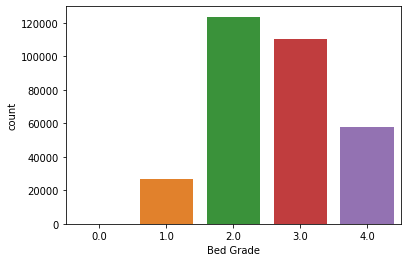

In [32]:
#Bed grade: 2,3 and 4 are most common
#Bed grade of 'NA' (that is shown as '0' in the graph below are uncommon. Neglectable.)

sns.countplot(data=train, x="Bed Grade")



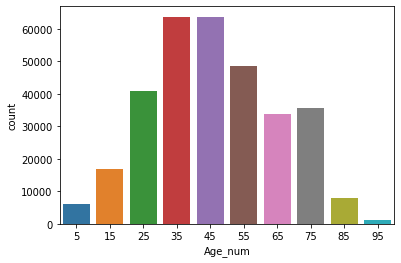

In [33]:
sns.countplot(data=train, x="Age_num")
#Age is almost normally disributed. 35 and 45 are most common 
# Either youngest and oldest people are relatively fewer.

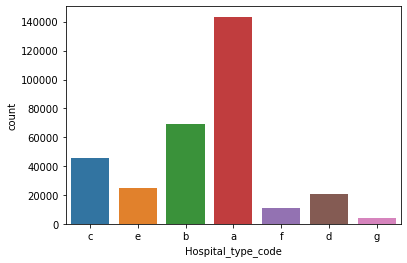

In [34]:
sns.countplot(data=train, x="Hospital_type_code")

#Hospital type a is the most frequent

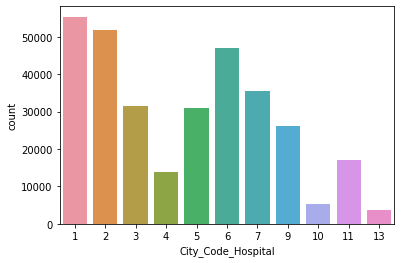

In [35]:
sns.countplot(data=train, x="City_Code_Hospital")

#Except 3, 10, 11 and 13, data is not too much unbalanced.

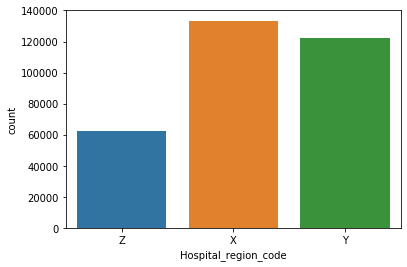

In [36]:
sns.countplot(data=train, x="Hospital_region_code")

# Hospital region code of X and Y are almost the same while Z is almost less than half of either X and Y.

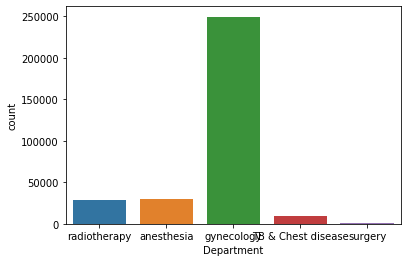

In [37]:
sns.countplot(data=train, x="Department") 

#Extremely unbalanced. It's mostly Gynecology 
#Perhaps removing this variable might be helpful.

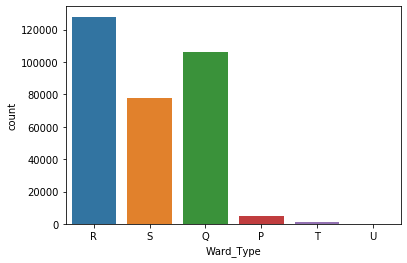

In [38]:
sns.countplot(data=train, x="Ward_Type")
# Mostly R S Q , not P T U

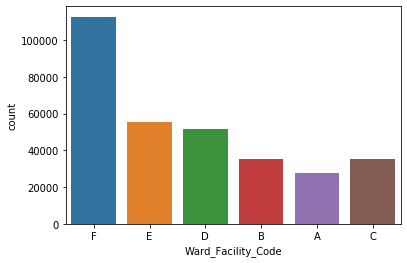

In [39]:
sns.countplot(data=train, x="Ward_Facility_Code")

#Mostly F

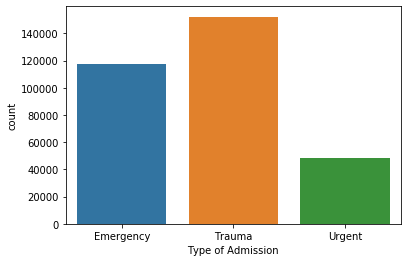

In [40]:
sns.countplot(data=train, x="Type of Admission")

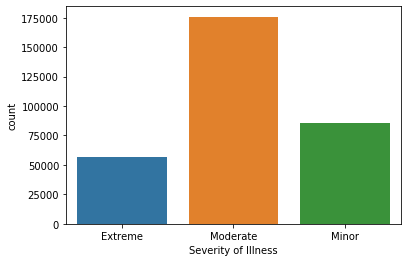

In [41]:
sns.countplot(data=train, x="Severity of Illness")
# Mostly Moderate.

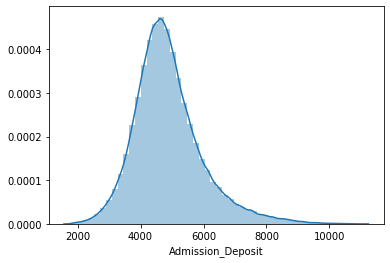

In [42]:
sns.distplot(train["Admission_Deposit"]) #Almost normaly distributed

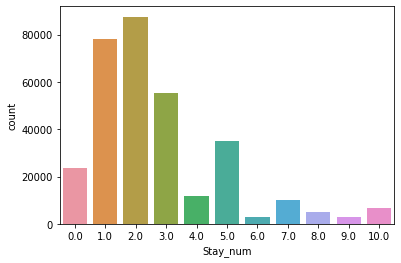

In [43]:
sns.countplot(data=train, x="Stay_num") # Similar to Poisson distribution

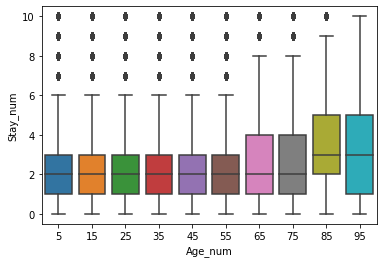

In [44]:
import matplotlib.pyplot as plt
sns.boxplot(data = train, x="Age_num", y="Stay_num")


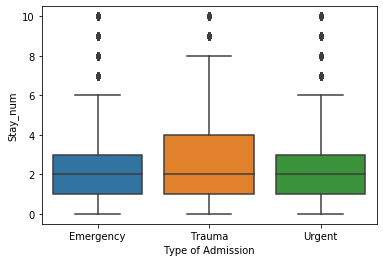

In [45]:
sns.boxplot(data = train, x="Type of Admission", y="Stay_num")

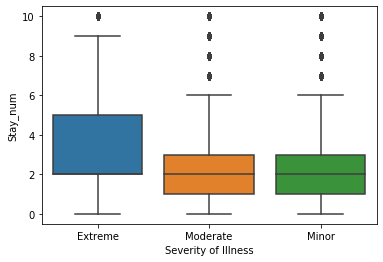

In [46]:
sns.boxplot(data = train, x="Severity of Illness", y="Stay_num")

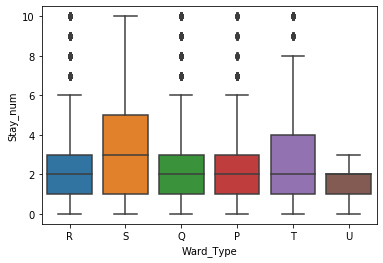

In [48]:
sns.boxplot(data = train, x="Ward_Type", y="Stay_num")

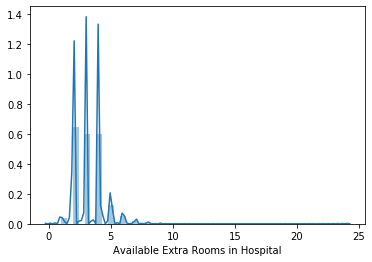

In [49]:
sns.distplot(trts["Available Extra Rooms in Hospital"]) 
#Highly unbalanced. Observation with Available extra rooms > 5 are rare.

Hospital_code                        318399
Hospital_type_code                   318399
City_Code_Hospital                   318399
Hospital_region_code                 318399
Available Extra Rooms in Hospital    318399
Department                           318399
Ward_Type                            318399
Ward_Facility_Code                   318399
Bed Grade                            318399
patientid                            318399
City_Code_Patient                    313867
Type of Admission                    318399
Severity of Illness                  318399
Visitors with Patient                318399
Age                                  318399
Admission_Deposit                    318399
Stay                                 318399
dataset                              318399
Age_num                              318399
Stay_num                             318399
dtype: int64

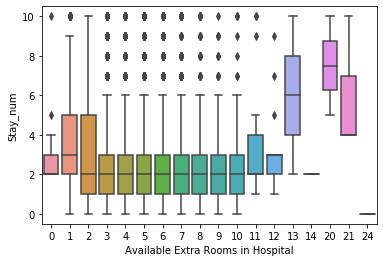

In [50]:

sns.boxplot(data = train, x="Available Extra Rooms in Hospital", y="Stay_num")
train.loc[train["Available Extra Rooms in Hospital"] >= 11].count()
train.loc[train["Available Extra Rooms in Hospital"] < 11].count()
# Patients stays much longer when the number of available extra room is more than 11.
# But due to the unbalanced data, it's not meaningful to split at 11. Only 39 observations are >= 11, 318399 observations are < 11.


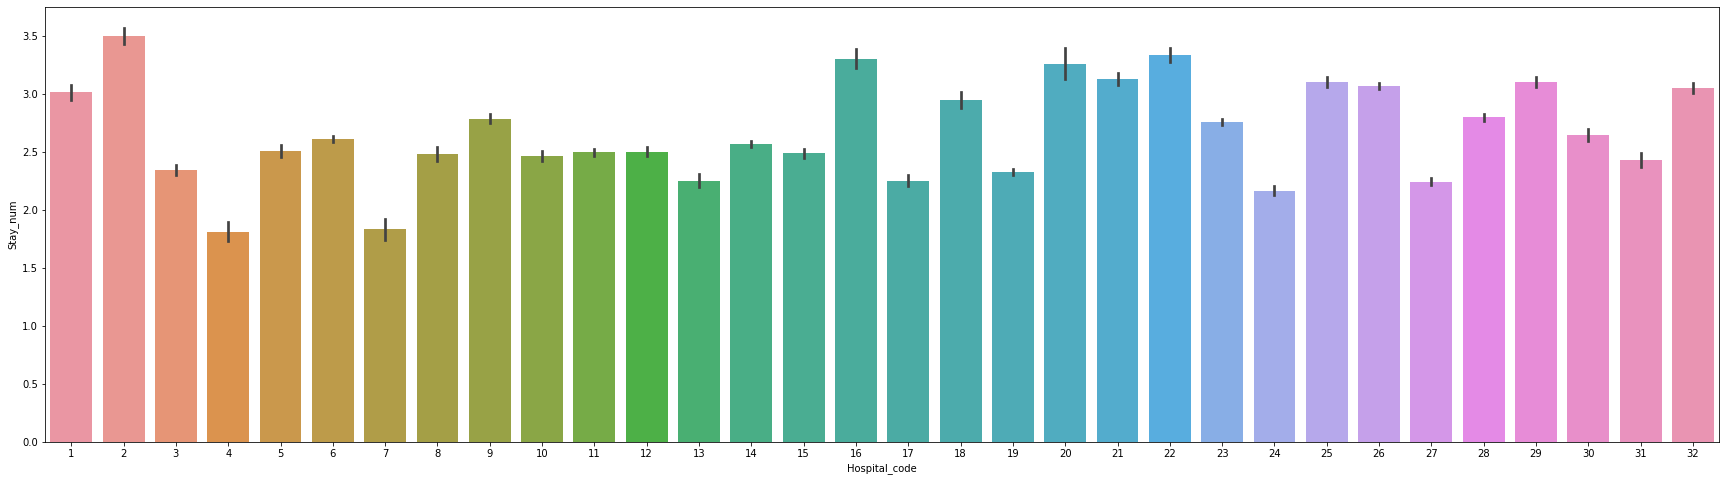

In [51]:
plt.figure(figsize=(30,8))
sns.barplot(data = train, x="Hospital_code", y="Stay_num")

# There is a clear tendancy of length of stay accrding to the hospiatal code.
# For example, 4 is much lower than 2.
# CI does not overlap among Hospital code


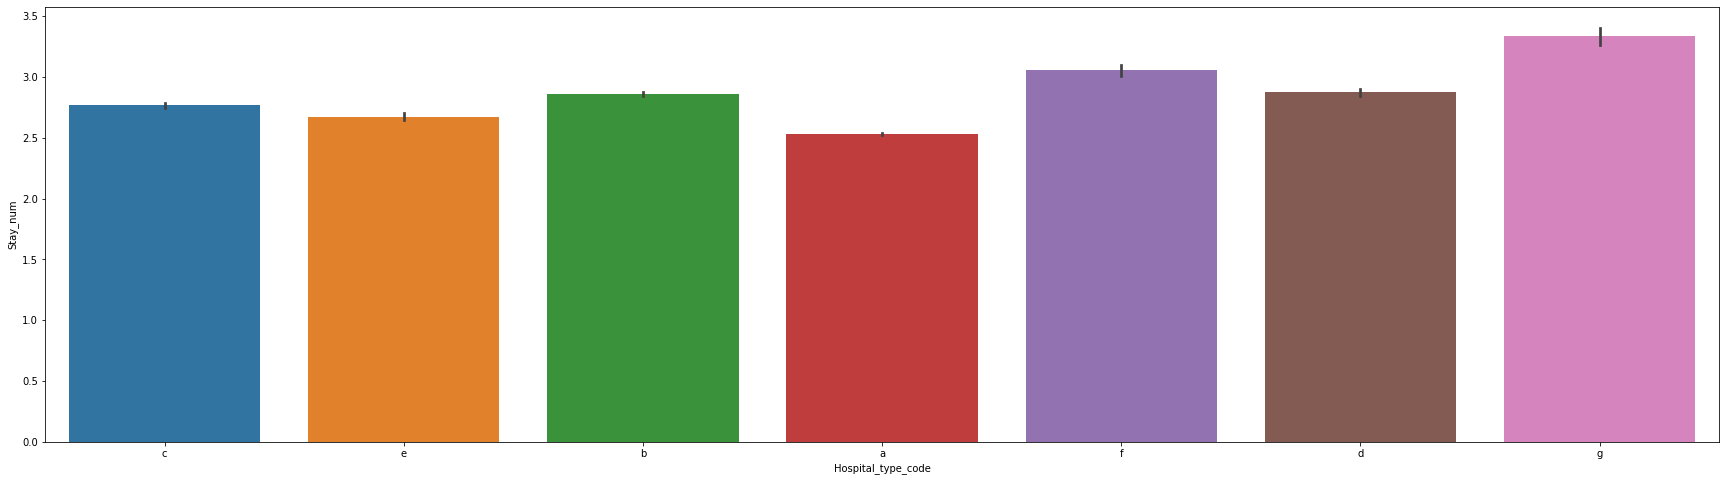

In [52]:
plt.figure(figsize=(30,8))
sns.barplot(data = train, x="Hospital_type_code", y="Stay_num")

# Much less difference among levels than in Hospital_code.

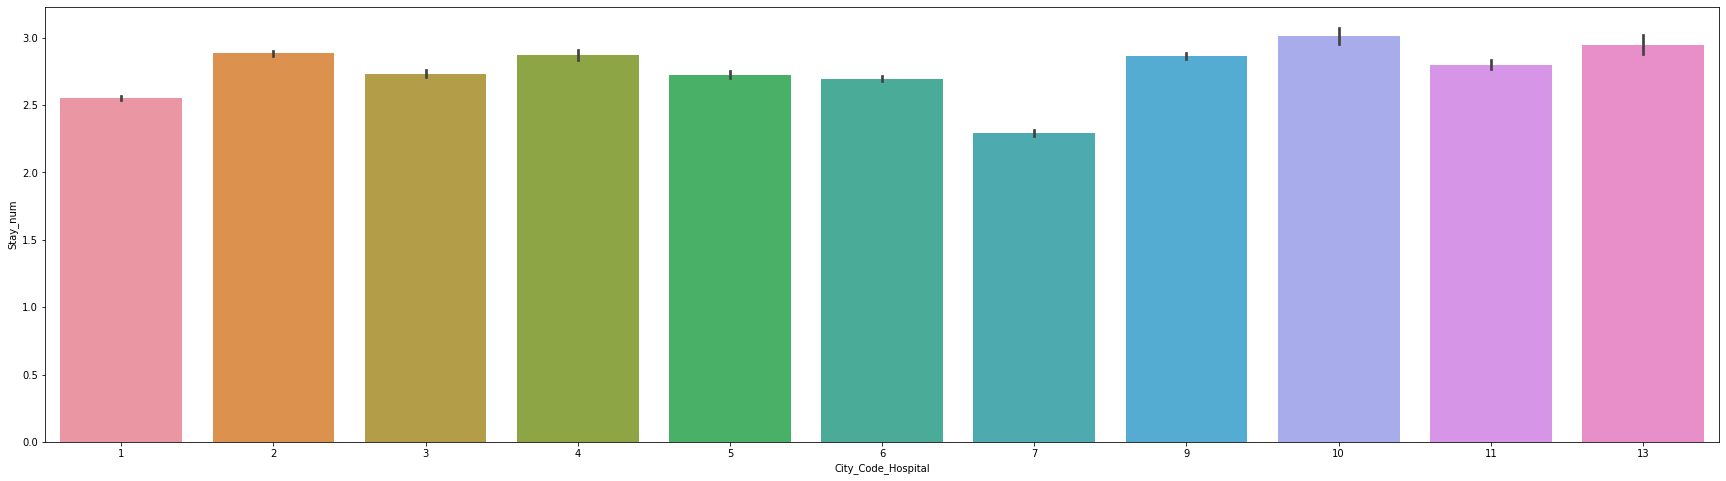

In [53]:
plt.figure(figsize=(30,8))
sns.barplot(data = train, x="City_Code_Hospital", y="Stay_num")

# Much less difference among levels than in Hospital_code.

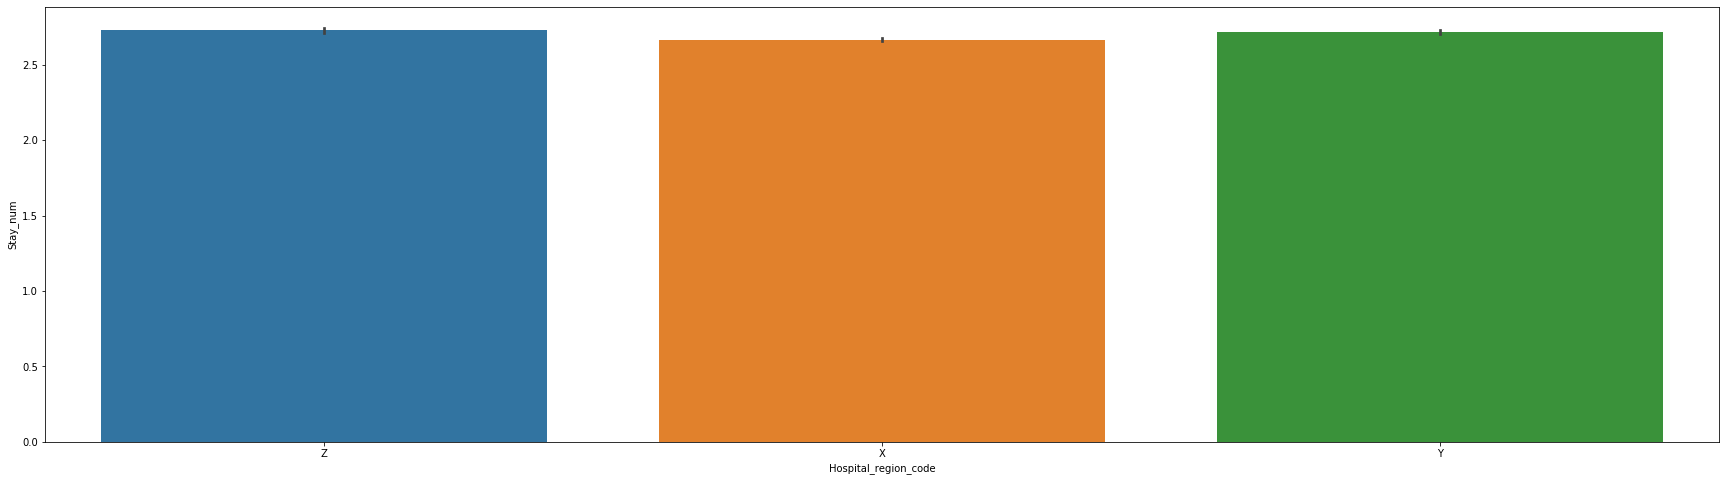

In [54]:
plt.figure(figsize=(30,8))
sns.barplot(data = train, x="Hospital_region_code", y="Stay_num")
# Much less difference among levels than in Hospital_code.

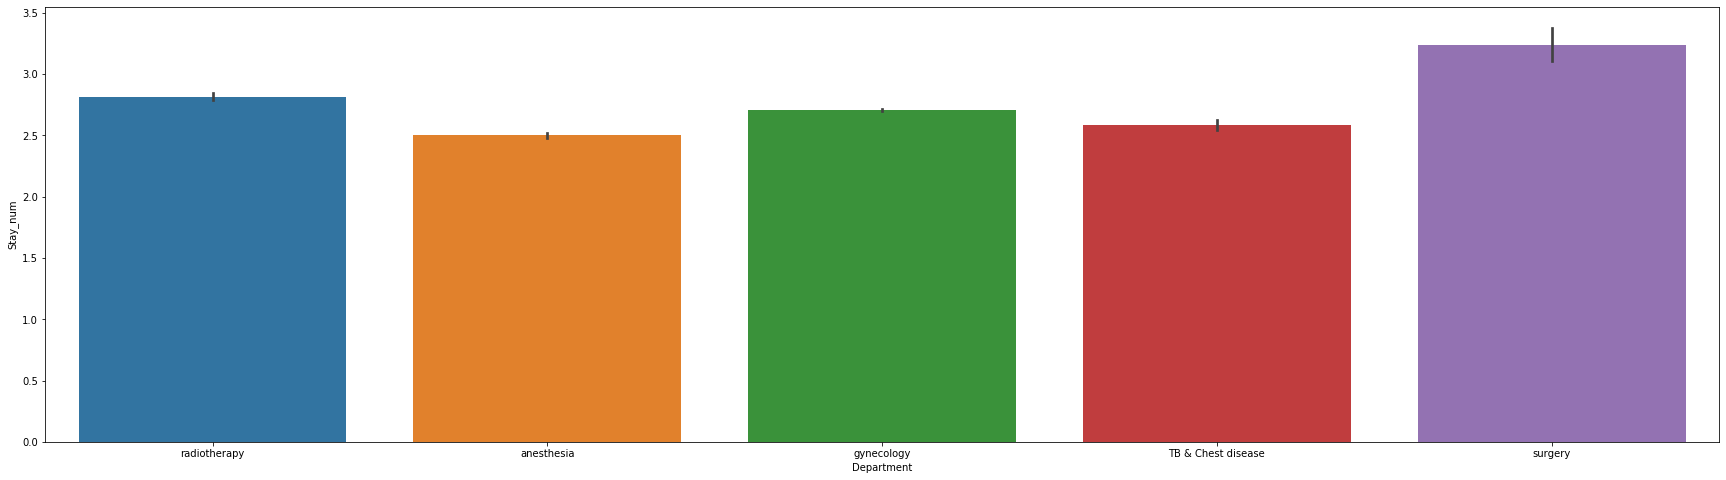

In [55]:
plt.figure(figsize=(30,8))
sns.barplot(data = train, x="Department", y="Stay_num")


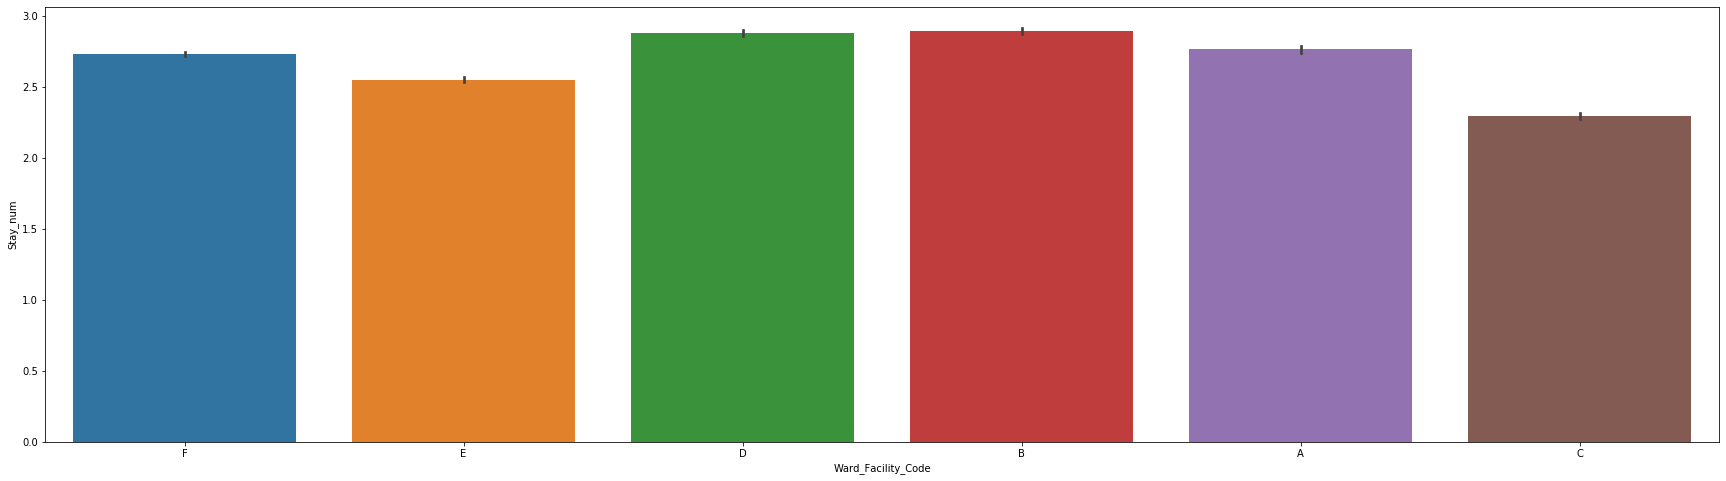

In [56]:
plt.figure(figsize=(30,8))
sns.barplot(data = train, x="Ward_Facility_Code", y="Stay_num")


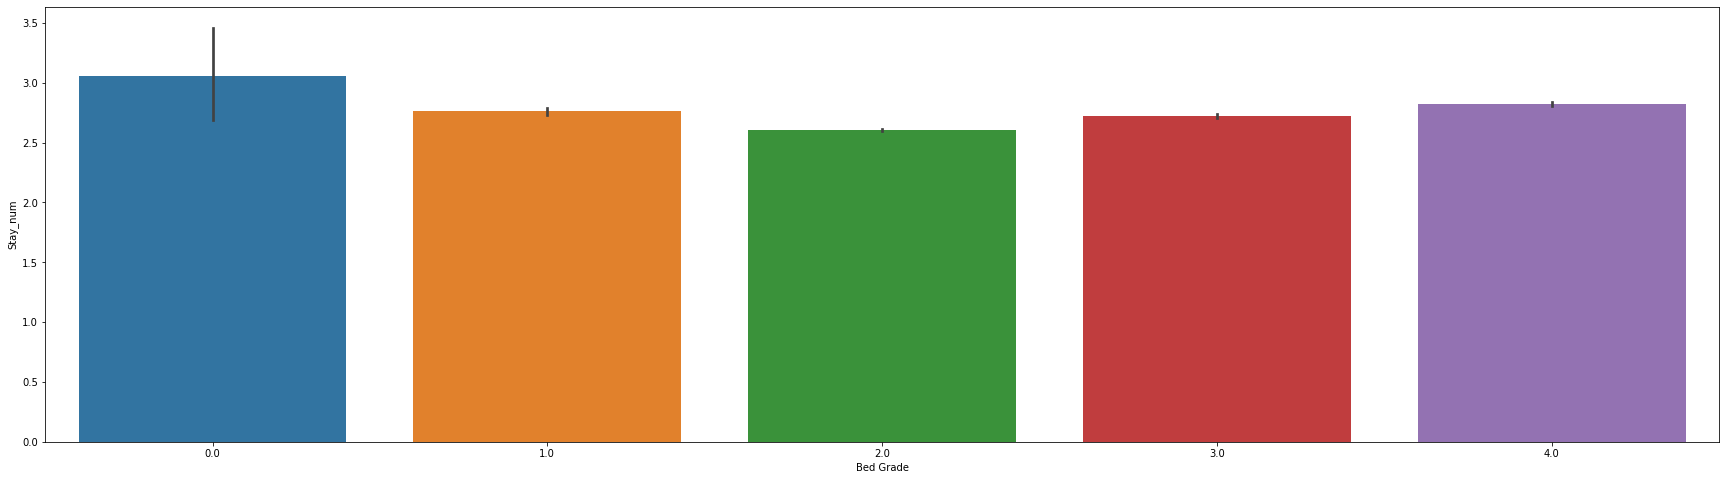

In [57]:
plt.figure(figsize=(30,8))
sns.barplot(data = train, x="Bed Grade", y="Stay_num")



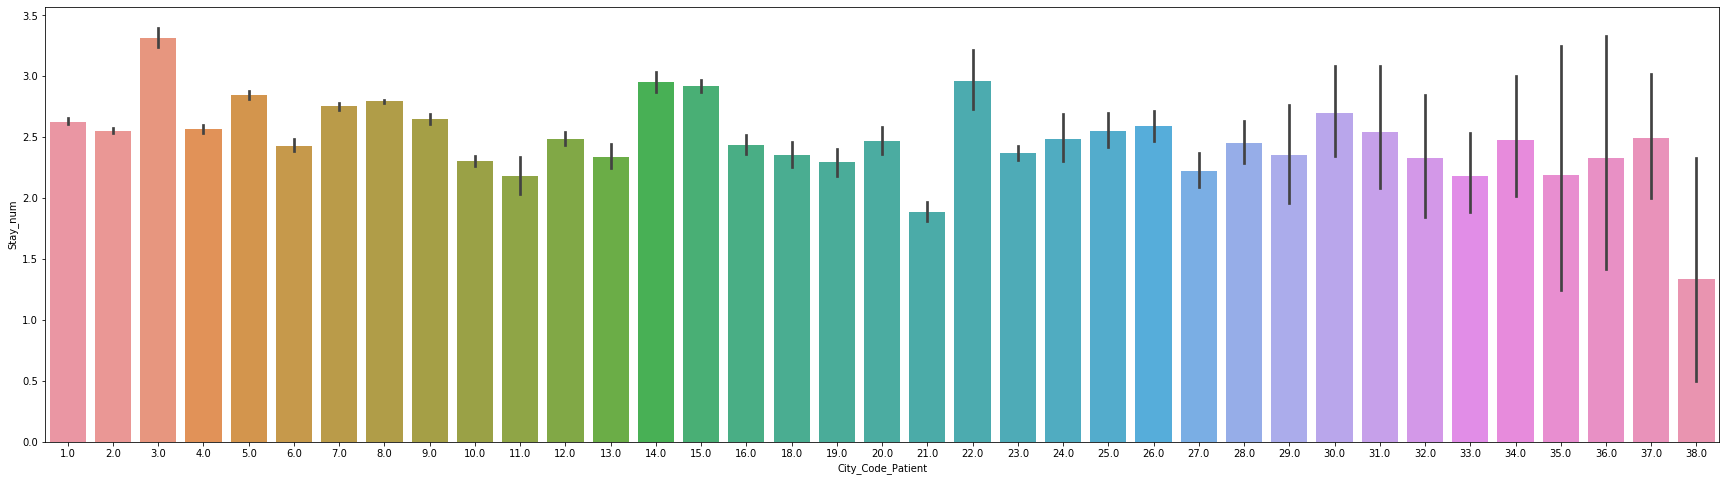

In [58]:
plt.figure(figsize=(30,8))
sns.barplot(data = train, x="City_Code_Patient", y="Stay_num")

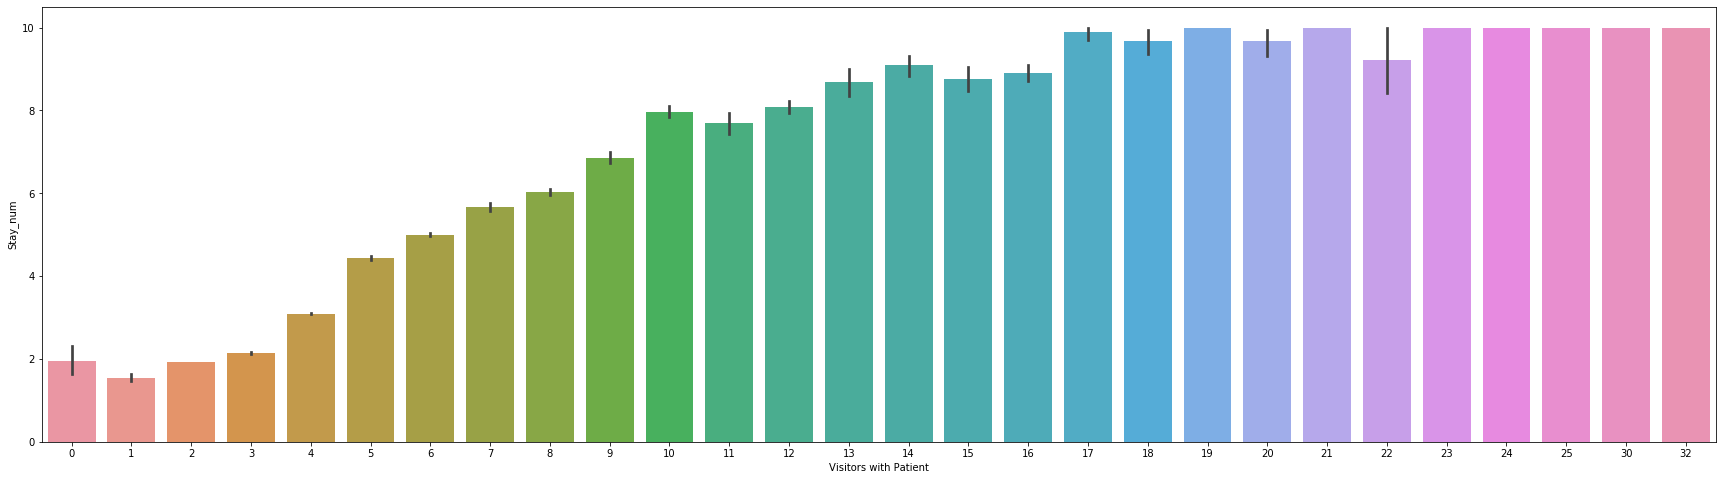

In [59]:
plt.figure(figsize=(30,8))
sns.barplot(data = train, x="Visitors with Patient", y="Stay_num")

# Surprisingly clear positive relationship contrary to my expectation.
# I expected it would be meaningless to predict length of stay.

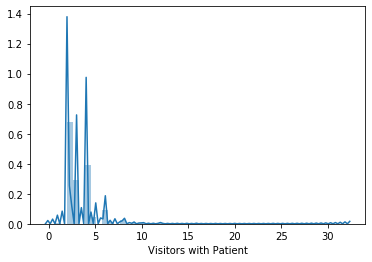

In [60]:
sns.distplot(train["Visitors with Patient"])

In [61]:
#sns.barplot(data = train, x="Admission_Deposit", y="Stay_num")

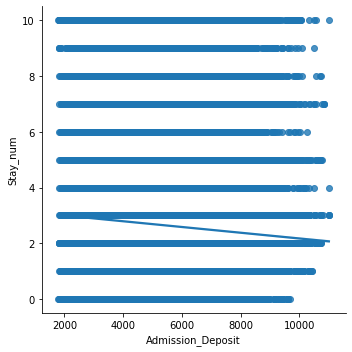

In [62]:
sns.lmplot(data = train, x="Admission_Deposit", y="Stay_num")

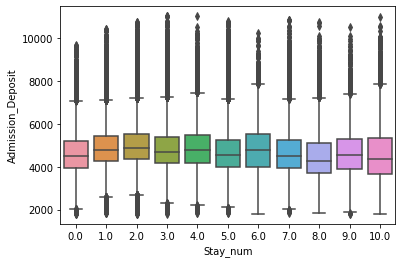

In [63]:
sns.boxplot(data = train, x="Stay_num", y="Admission_Deposit")

# Almost no pattern

## Developing model

In [26]:

trts['Hospital_code'] = trts['Hospital_code'].astype(str)
trts['City_Code_Patient'] = trts['City_Code_Patient'].astype(str)

In [27]:
cat_var = ['Hospital_code','Department', 'Ward_Type','City_Code_Patient','Type of Admission','Severity of Illness']
num_var = ["Stay_num",'Age_num','Admission_Deposit','Visitors with Patient']


cat_trts = pd.get_dummies(trts[cat_var], drop_first = True)
num_trts = trts[num_var] 
new_trts = pd.concat([num_trts, cat_trts, trts["dataset"]], axis = 1)
new_trts

,Stay_num,Age_num,Admission_Deposit,Visitors with Patient,Hospital_code_10,Hospital_code_11,Hospital_code_12,Hospital_code_13,Hospital_code_14,Hospital_code_15,...,City_Code_Patient_5.0,City_Code_Patient_6.0,City_Code_Patient_7.0,City_Code_Patient_8.0,City_Code_Patient_9.0,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,dataset
case_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,55,4911.0,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,train
2,4.0,55,5954.0,2,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,train
3,3.0,55,4745.0,2,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,train
4,4.0,55,7272.0,2,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,train
5,4.0,55,5558.0,2,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455491,NaN,45,6313.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,test
455492,NaN,5,3510.0,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,test
455493,NaN,5,7190.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,test


In [28]:
#Setting training and test dataset

train = new_trts.loc[new_trts["dataset"] == "train"]
test = new_trts.loc[new_trts["dataset"] == "test"]

print(train.shape)
print(test.shape)

train.head()

(318438, 86)
(137057, 86)


,Stay_num,Age_num,Admission_Deposit,Visitors with Patient,Hospital_code_10,Hospital_code_11,Hospital_code_12,Hospital_code_13,Hospital_code_14,Hospital_code_15,...,City_Code_Patient_5.0,City_Code_Patient_6.0,City_Code_Patient_7.0,City_Code_Patient_8.0,City_Code_Patient_9.0,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,dataset
case_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,55,4911.0,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,train
2,4.0,55,5954.0,2,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,train
3,3.0,55,4745.0,2,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,train
4,4.0,55,7272.0,2,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,train
5,4.0,55,5558.0,2,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,train


In [29]:

# Create the X and y set
X_train = train.iloc[:,1:85]
y_train = train.iloc[:,0]
X_test = test.iloc[:,1:85]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(318438, 84)
(318438,)
(137057, 84)


In [30]:
X_train.head()


,Age_num,Admission_Deposit,Visitors with Patient,Hospital_code_10,Hospital_code_11,Hospital_code_12,Hospital_code_13,Hospital_code_14,Hospital_code_15,Hospital_code_16,...,City_Code_Patient_4.0,City_Code_Patient_5.0,City_Code_Patient_6.0,City_Code_Patient_7.0,City_Code_Patient_8.0,City_Code_Patient_9.0,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate
case_id,,,,,,,,,,,,,,,,,,,,,
1,55,4911.0,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,55,5954.0,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,55,4745.0,2,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,55,7272.0,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,55,5558.0,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [31]:
y_train

case_id
1         0.0
2         4.0
3         3.0
4         4.0
5         4.0
         ... 
318434    1.0
318435    3.0
318436    1.0
318437    1.0
318438    0.0
Name: Stay_num, Length: 318438, dtype: float64

In [32]:
X_test.head()

,Age_num,Admission_Deposit,Visitors with Patient,Hospital_code_10,Hospital_code_11,Hospital_code_12,Hospital_code_13,Hospital_code_14,Hospital_code_15,Hospital_code_16,...,City_Code_Patient_4.0,City_Code_Patient_5.0,City_Code_Patient_6.0,City_Code_Patient_7.0,City_Code_Patient_8.0,City_Code_Patient_9.0,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate
case_id,,,,,,,,,,,,,,,,,,,,,
318439,75,3095.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
318440,75,4018.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
318441,75,4492.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
318442,75,4173.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
318443,75,4161.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [33]:
# Ref: www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm
# Hyperparameter tuning for Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve,GridSearchCV

In [34]:
param_grid1 ={'learning_rate':[0.1,0.01,0.001], 
              'n_estimators':[250, 500, 1000,1500]}

GBtune = GridSearchCV(estimator= GradientBoostingClassifier(max_depth=3,
                                                           min_samples_split = 2,
                                                           min_samples_leaf = 1,
                                                           subsample = 1,
                                                           max_features = 'sqrt',
                                                           random_state = 10),
                     param_grid = param_grid1,
                     scoring = 'accuracy',
                     n_jobs = 4,
                     iid = False,
                     cv = 5)
GBtune.fit(X_train,y_train)

/Users/hjung9/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
       

In [36]:
#Ref: Datacamp code
cv_results_df = pd.DataFrame(GBtune.cv_results_)


In [37]:
# Checking the results of hyperparameter tuning by storing the results as a dataframe

cv_results_df.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1980.910396,37.044340,21.176580,2.460016,0.1,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.412432,0.409952,0.408162,0.408576,0.396423,0.407109,0.005547,2
1,2889.762385,16.343305,30.323324,4.012488,0.1,1500,"{'learning_rate': 0.1, 'n_estimators': 1500}",0.413720,0.409481,0.409857,0.409518,0.396219,0.407759,0.005986,1
2,1933.867033,33.387815,17.525612,0.547709,0.01,1000,"{'learning_rate': 0.01, 'n_estimators': 1000}",0.394784,0.393795,0.390293,0.392278,0.383579,0.390946,0.003983,4
3,2746.497944,175.735092,23.577620,1.479878,0.01,1500,"{'learning_rate': 0.01, 'n_estimators': 1500}",0.399808,0.397783,0.394800,0.396345,0.387159,0.395179,0.004337,3


In [38]:
# After applying the best learning_rate and n_estimators, testing which max_depth will be the best

best_n_estimators = GBtune.best_params_["n_estimators"]
best_learning_rate = GBtune.best_params_["learning_rate"]



In [39]:
# Here we can see the best n_estimators is 1500 and the best learning_rate is 0.1

print(best_n_estimators)
print(best_learning_rate)

1500
0.1


In [77]:
# Hyperparameter tuning with max_depth (3,4 and 5)

# Ref: www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm

param_grid2 ={'max_depth':[3,4,5]}

GBtune_depth = GridSearchCV(estimator= GradientBoostingClassifier(learning_rate = best_learning_rate,
                                                            n_estimators = best_n_estimators,
                                                           min_samples_split = 2,
                                                           min_samples_leaf = 1,
                                                           subsample = 1,
                                                           max_features = 'sqrt',
                                                           random_state = 10),
                     param_grid = param_grid2,
                     scoring = 'accuracy',
                     n_jobs = 2,
                     iid = False,
                     cv = 5)
GBtune_depth.fit(X_train,y_train)

/Users/hjung9/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=1500,
                                                  n_iter_no_change=None,
      

In [78]:
#Checking the results of hyperparameter tuning by saving the results into dataframe

cv_depth_results_df = pd.DataFrame(GBtune_depth.cv_results_)


(3, 14)


In [79]:
cv_depth_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2365.348366,62.460083,24.087806,1.737540,3,{'max_depth': 3},0.413076,0.409402,0.408837,0.410492,0.396015,0.407564,0.005955,1
1,2816.081442,53.411791,22.631091,0.524007,4,{'max_depth': 4},0.411365,0.410014,0.408633,0.407807,0.393471,0.406258,0.006507,2
2,3255.402122,127.359997,23.772547,1.229906,5,{'max_depth': 5},0.410376,0.405759,0.407141,0.406504,0.388180,0.403592,0.007865,3


In [ ]:
#Ref: Datacamp code
# Extracting the best row

best_depth_row = cv_depth_results_df[cv_depth_results_df["rank_test_score"]==1]
print(best_depth_row)

best_depth = GBtune_depth.best_params_["param_max_depth"]


In [83]:
# Here we can see the best max_depth is 3 among 3,4, and 5
best_depth = GBtune.best_params_["max_depth"]
best_depth



3

In [87]:
# Evaluation of best model chosen on Test set

bestmod = GradientBoostingClassifier(learning_rate = best_learning_rate,
                                     n_estimators = best_n_estimators,
                                     max_depth = best_depth,
                                     min_samples_split = 2,
                                     min_samples_leaf = 1,
                                     subsample = 1,
                                     max_features = 'sqrt',
                                     random_state = 10)

In [88]:
bestmod.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [89]:
# Create feature importance plot
predictors = list(X_train)


['Age_num',
 'Admission_Deposit',
 'Visitors with Patient',
 'Hospital_code_10',
 'Hospital_code_11',
 'Hospital_code_12',
 'Hospital_code_13',
 'Hospital_code_14',
 'Hospital_code_15',
 'Hospital_code_16',
 'Hospital_code_17',
 'Hospital_code_18',
 'Hospital_code_19',
 'Hospital_code_2',
 'Hospital_code_20',
 'Hospital_code_21',
 'Hospital_code_22',
 'Hospital_code_23',
 'Hospital_code_24',
 'Hospital_code_25',
 'Hospital_code_26',
 'Hospital_code_27',
 'Hospital_code_28',
 'Hospital_code_29',
 'Hospital_code_3',
 'Hospital_code_30',
 'Hospital_code_31',
 'Hospital_code_32',
 'Hospital_code_4',
 'Hospital_code_5',
 'Hospital_code_6',
 'Hospital_code_7',
 'Hospital_code_8',
 'Hospital_code_9',
 'Department_anesthesia',
 'Department_gynecology',
 'Department_radiotherapy',
 'Department_surgery',
 'Ward_Type_Q',
 'Ward_Type_R',
 'Ward_Type_S',
 'Ward_Type_T',
 'Ward_Type_U',
 'City_Code_Patient_10.0',
 'City_Code_Patient_11.0',
 'City_Code_Patient_12.0',
 'City_Code_Patient_13.0',
 'City

In [ ]:
#Feature importance plot
f_imp = pd.Series(bestmod.feature_importances_, predictors).sort_values(ascending = False)
f_imp.plot(kind = 'bar', title = "Feature importance plot",figsize=(17, 5))
plt.ylabel('Feature Importance Score')


## Deploy solution

In [92]:
prediction = bestmod.predict(X_test)
prediction

array([0., 5., 2., ..., 2., 1., 3.])

In [104]:
#Trying to convert numpy.ndarray into dataframe

prediction = pd.DataFrame(data=prediction, columns=["prediction"])

In [107]:
# Convert the values to the original values


replace_values = { 0: '0-10', 
                   1: '11-20', 
                   2: '21-30',
                   3: '31-40',
                   4: '41-50',
                   5: '51-60',
                   6: '61-70',
                   7: '71-80',
                   8: '81-90',
                   9: '91-100',
                   10: 'More than 100 Days'
                 }                                                                                          

prediction["prediction"] = prediction["prediction"].map(replace_values) 

In [109]:
submission = pd.read_csv("sample_sub.csv")

In [111]:
submission["Stay"] = prediction

In [113]:
submission.to_csv("COVIDsubmit.csv", index = False)